In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Loading the data**

In [6]:
data = pd.read_csv("../dataset/creditcard.csv", encoding='utf-8')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **Saving a copy of the data**

In [7]:
data_copy = data.copy()

**first lets drop the time column**

In [8]:
data.drop('Time', axis=1, inplace=True)

# **Data Visualation**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

**target class distribution**

C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

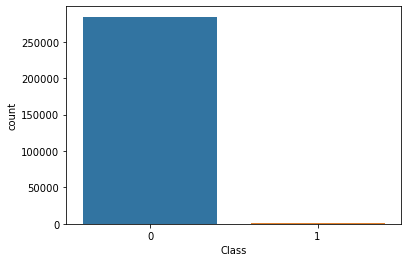

In [10]:
sns.countplot(data['Class'])

**There is massive imbalance in the target class we will fix this in the data processing step**

**Histogram of all columns**

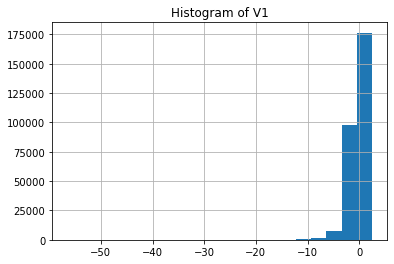

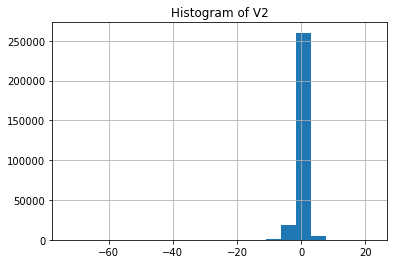

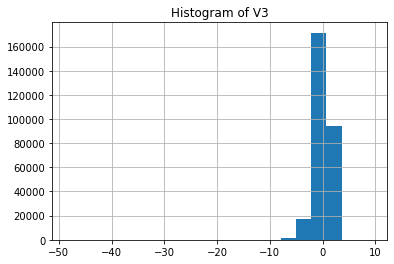

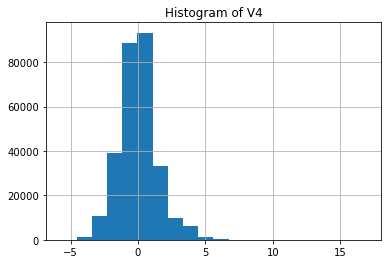

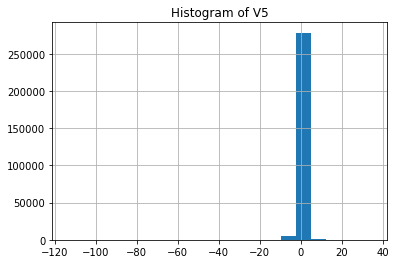

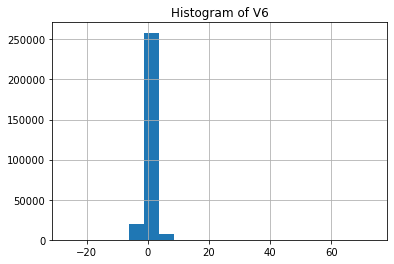

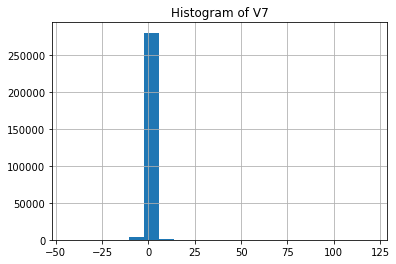

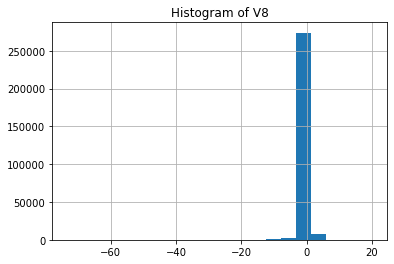

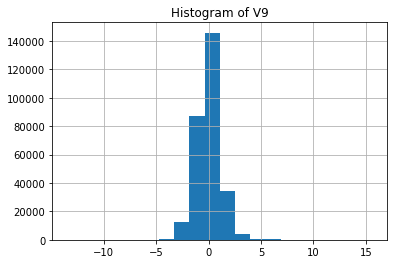

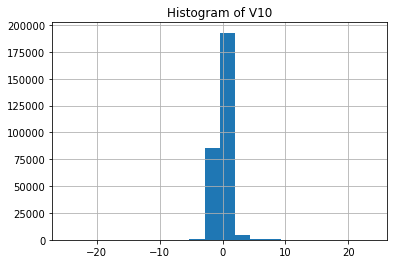

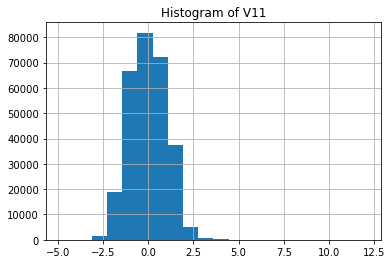

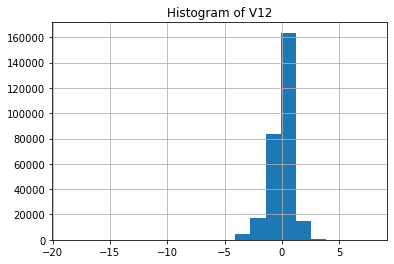

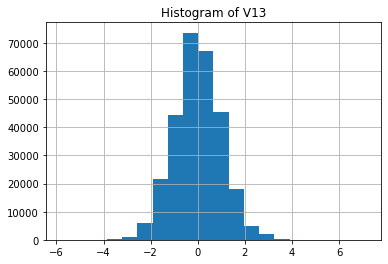

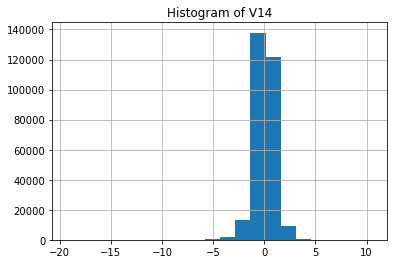

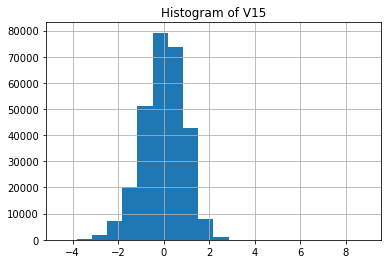

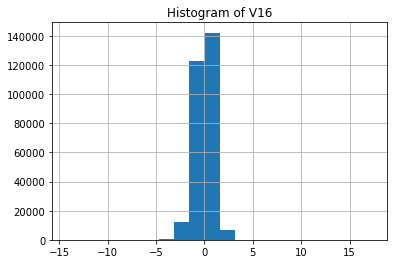

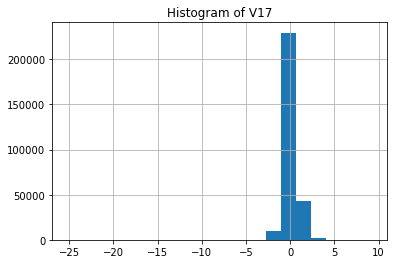

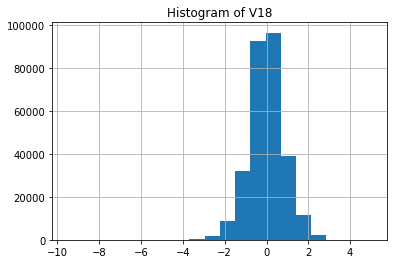

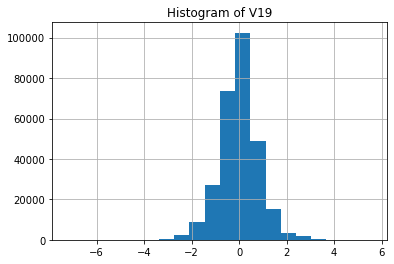

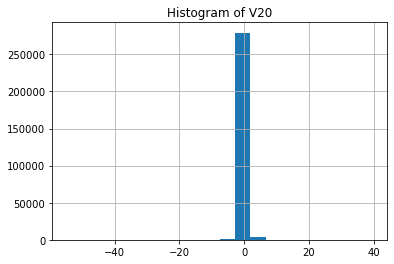

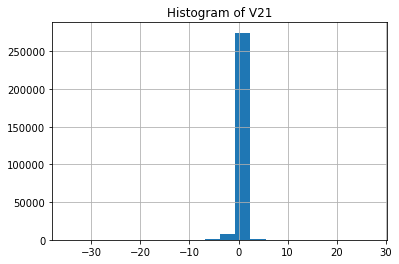

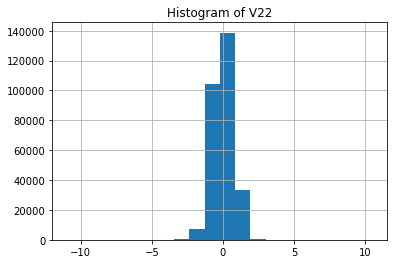

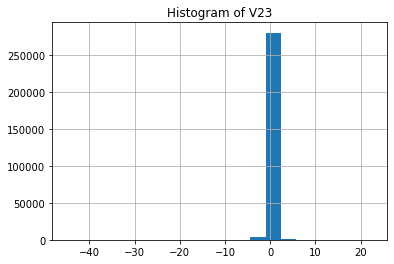

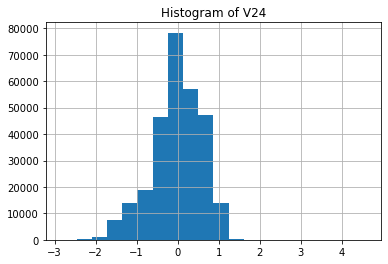

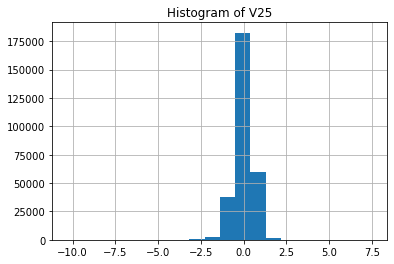

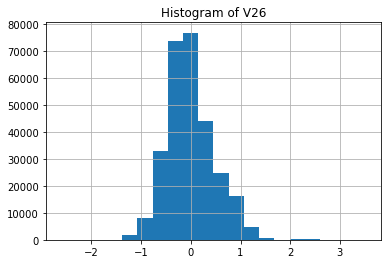

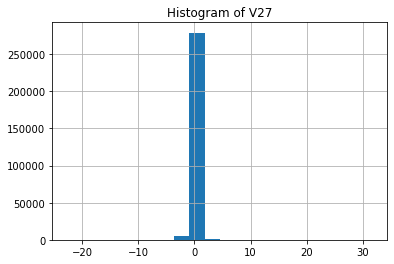

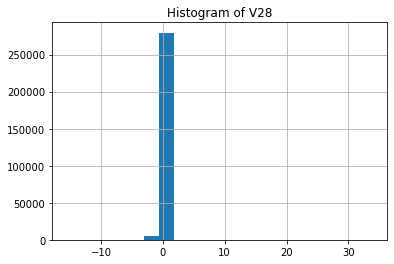

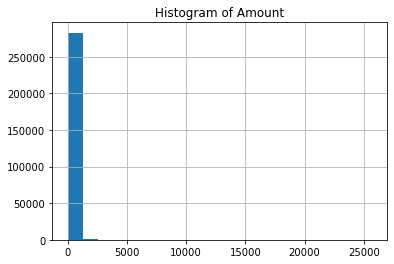

In [11]:
for col in data.columns[:-1]:
    plt.title(f'Histogram of {col}')
    data[col].hist(bins=20)
    plt.show()

**Correlation matrix of the data**

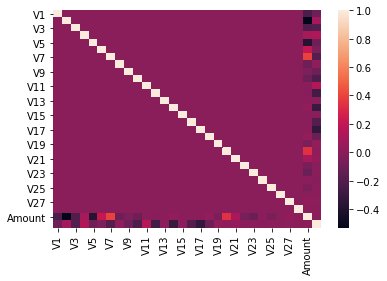

In [12]:
corr = data.corr()
sns.heatmap(corr)
plt.show()

# **Data processing** 

**first lets check for null values and remove if any**

In [13]:
data.isnull().sum().sum()

0

**now lets scale the amount column as all the columns are already scaled**

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
scaler = RobustScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

**now lets detect and remove outliars**

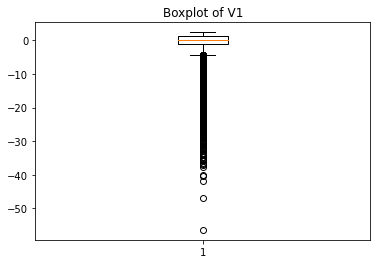

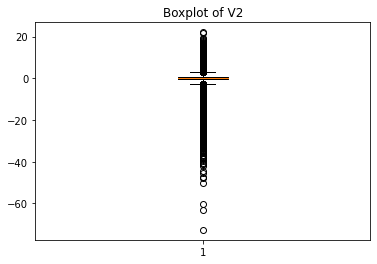

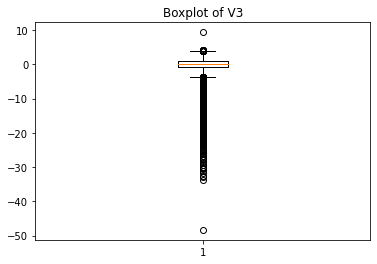

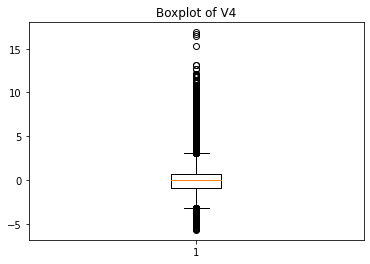

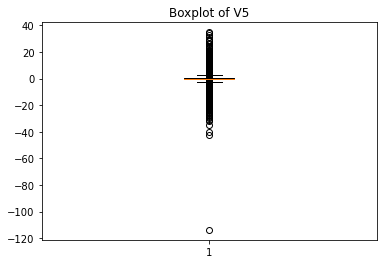

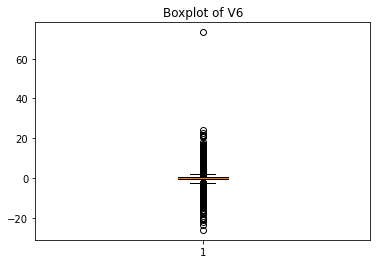

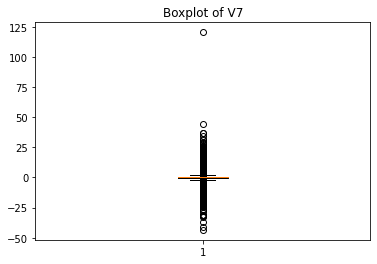

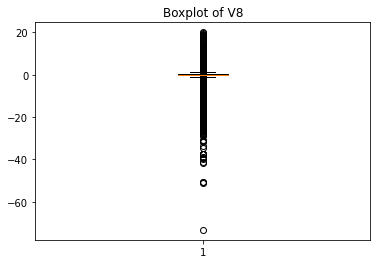

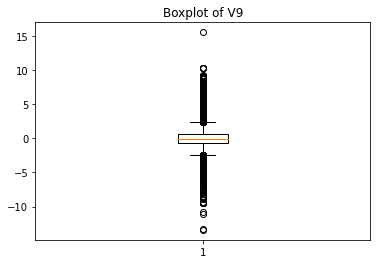

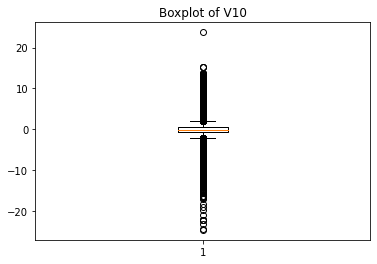

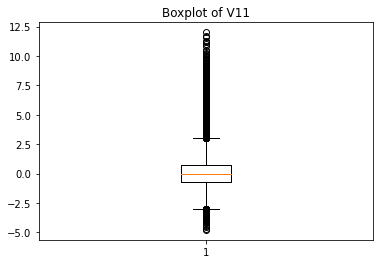

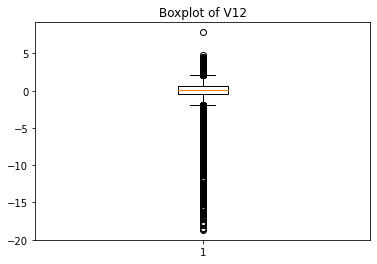

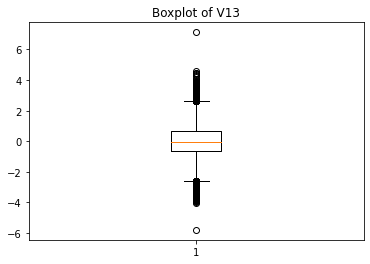

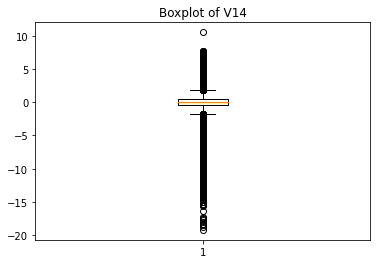

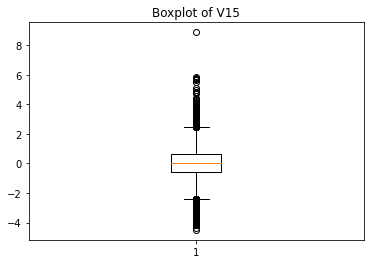

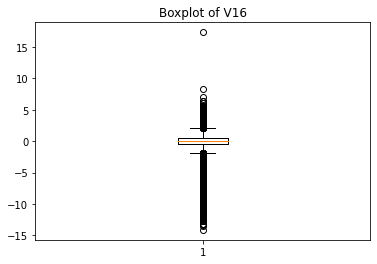

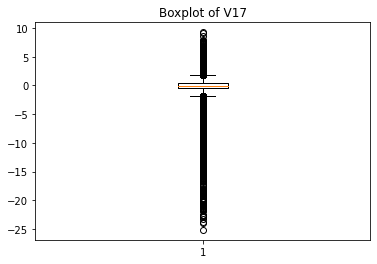

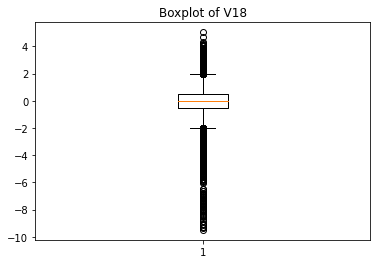

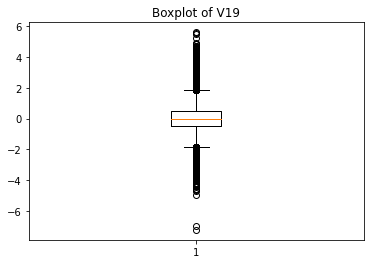

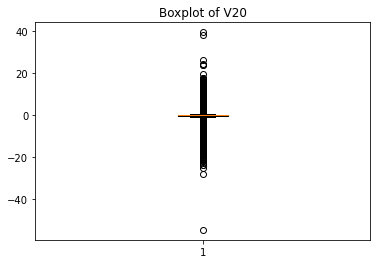

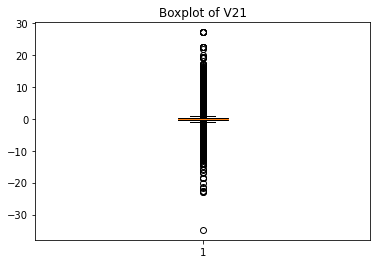

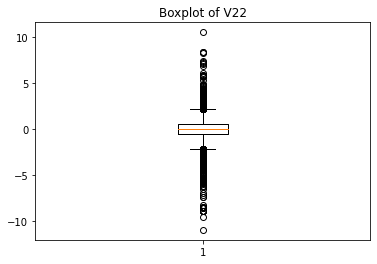

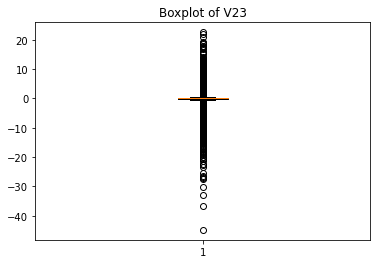

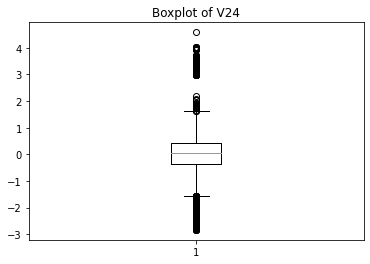

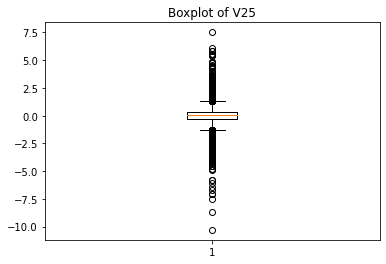

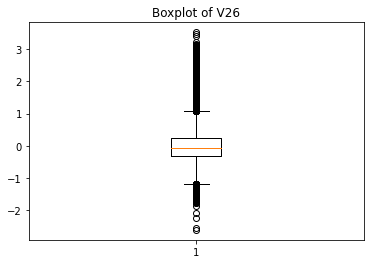

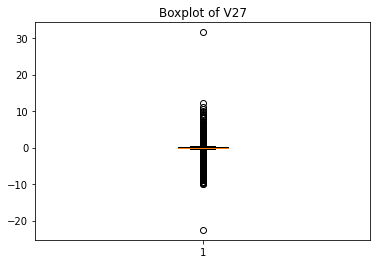

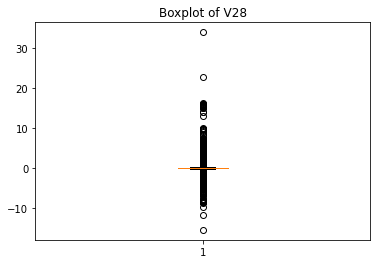

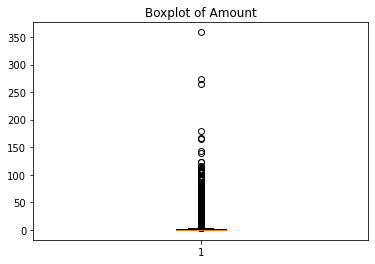

In [16]:
for col in data.columns[:-1]:
    plt.title(f'Boxplot of {col}')
    plt.boxplot(data[col])
    plt.show()

**ok there are many outliars in the dataset lets remove them**

In [17]:
outliars = data.columns.drop('Class')

In [18]:
def remove_outliars(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
    
    return data_clean

In [19]:
data[outliars] = remove_outliars(data[outliars])

In [20]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
284805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


**the function has changed all outliars to nan values so lets remove them**

In [21]:
data.dropna(inplace=True)

In [22]:
print('Shape of data with outliars: ', data_copy.shape)
print('Shape of data without outliars: ', data.shape)

Shape of data with outliars:  (284807, 31)
Shape of data without outliars:  (146334, 30)


In [23]:
print('Number of outliars removed: ', data_copy.shape[0] - data.shape[0])

Number of outliars removed:  138473


**138473 outliars were removed from the data which is great because our model will not be confused by the outliars**

In [24]:
X = data.drop('Class', axis=1)
y = data['Class']

C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

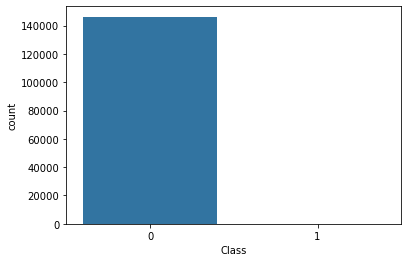

In [25]:
sns.countplot(y)

**our target column is heavily imbalanced, lets balance them using smote**

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote = SMOTE(random_state=56)
X, y = smote.fit_resample(X, y)

C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

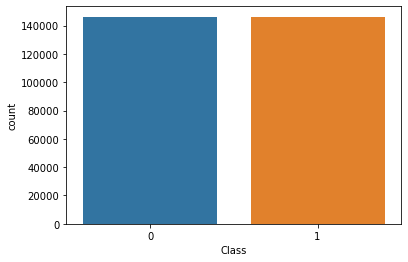

In [29]:
sns.countplot(y)

**now our target class is balanced**

# **Splitting the data into training and testing sets**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

# **Model Building and training**

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\steve\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Predictions**

In [34]:
pred = model.predict(x_test)
pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

# **Precision, Recall, Accuracy and AUC score check**

In [35]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, f1_score

In [36]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.92      0.95     29370\n           1       0.92      0.99      0.96     29158\n\n    accuracy                           0.95     58528\n   macro avg       0.96      0.95      0.95     58528\nweighted avg       0.96      0.95      0.95     58528\n'

In [37]:
f1_score(y_test, pred)

0.9550803199576915

Text(0.5, 1.0, 'Precision Recall Curve')

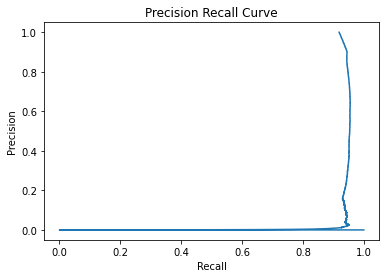

In [38]:
y_pred_prob = model.predict_proba(x_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

In [39]:
print("AUC score is: ", roc_auc_score(y_test, pred))

AUC score is:  0.9536957405093118


**Precision, Recall, Accuracy and AUC scores are excellent**